Imports

In [2]:
# Data imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import linear_model
from sklearn.datasets import load_iris

Data Preparation

In [3]:
iris = load_iris()

In [4]:
X = iris.data
Y = iris.target

In [5]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
iris_data = DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [7]:
iris_target = DataFrame(Y, columns=['Species'])

In [8]:
iris_target.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [10]:
iris_target.tail()

,Species
145,2
146,2
147,2
148,2
149,2


In [11]:
def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return ' Versicolor'
    else:
        return 'Virginica'

In [12]:
iris_target['Species'] = iris_target['Species'].apply(flower)

In [13]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [14]:
iris = pd.concat([iris_data, iris_target], axis=1)

In [15]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


Data Visualization and Analysis

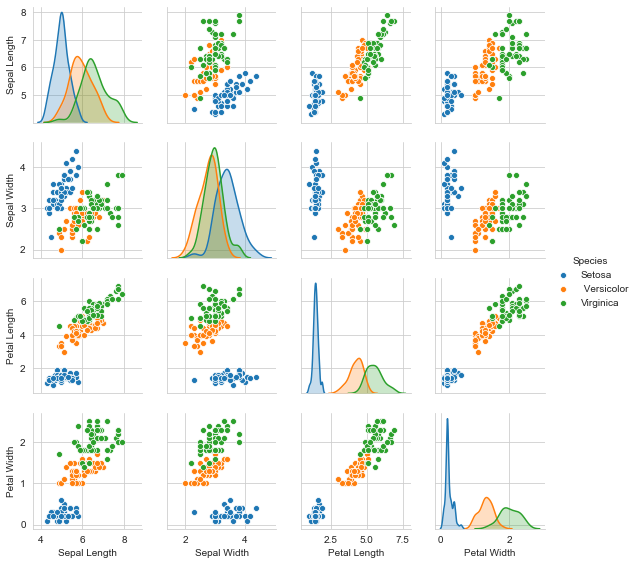

In [17]:
sns.pairplot(iris, hue='Species', height=2)

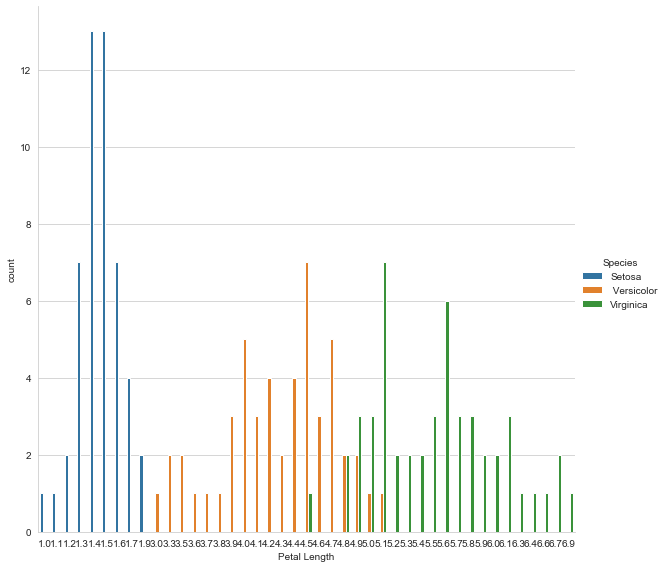

In [19]:
sns.catplot('Petal Length', data=iris, kind='count', hue='Species', height=8)

Multiclass Classification with Sci Kit Learn

In [21]:
# New imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4, random_state=3)

In [25]:
logreg.fit(X_train, Y_train)

C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\michael.manna\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
from sklearn import metrics

In [27]:
Y_pred = logreg.predict(X_test)

In [28]:
print (metrics.accuracy_score(Y_test, Y_pred))

0.9333333333333333


K-Nearest Neighbors

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=6)

In [31]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [32]:
Y_pred = knn.predict(X_test)

In [33]:
print (metrics.accuracy_score(Y_test, Y_pred))

0.95


In [35]:
# with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
print (metrics.accuracy_score(Y_test, Y_pred))

0.9666666666666667


In [37]:
# find optimal k value
k_range = range(1,21)
accuracy = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, Y_train)
        Y_pred = knn.predict(X_test)
        accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0, 0.5, 'Testing Accuracy')

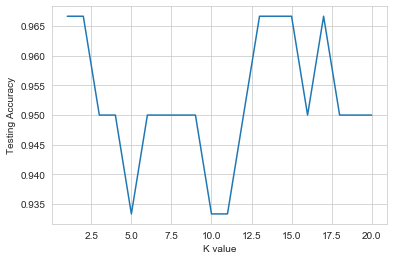

In [38]:
plt.plot(k_range, accuracy)
plt.xlabel('K value')
plt.ylabel('Testing Accuracy')